In [1]:
import glob
import pandas

In [2]:
#weather data
prcp_df = pandas.read_csv("C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\weather_data_noaa.csv",dtype=str)
prcp_df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,TOBS,AWND,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03,WT10
0,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,20130701,0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,20130702,655,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,20130703,0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,20130716,0,-9999,0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,20130717,0,-9999,0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [3]:
prcp_df = prcp_df[prcp_df['STATION_NAME']=='NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US'][['DATE','PRCP','SNOW']].reset_index()
prcp_df['Year'] = prcp_df['DATE'].apply(lambda x: int(x[0:4]))
prcp_df['Month'] = prcp_df['DATE'].apply(lambda x: int(x[4:6]))
prcp_df['Day'] = prcp_df['DATE'].apply(lambda x: int(x[6:8]))
prcp_df = prcp_df.drop(['index','DATE'],axis=1)
prcp_df.head()

,PRCP,SNOW,Year,Month,Day
0,213,0,2013,7,1
1,20,0,2013,7,2
2,135,0,2013,7,3
3,0,0,2013,7,4
4,0,0,2013,7,5


In [4]:
weather_df = pandas.read_csv("C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\jfk_temp_data.txt",dtype=str)

# convert date to datetime
weather_df['Date'] = weather_df['Date']+' '+weather_df['HrMn']
weather_df['Date'] = pandas.to_datetime(weather_df['Date'], format='%Y%m%d %H%M')
weather_df = weather_df.drop('HrMn',1)
weather_df = weather_df.drop('QCP',1)
weather_df = weather_df.drop('USAF',1)
weather_df = weather_df.drop('NCDC.',1)
weather_df = weather_df.drop('I',1)
weather_df = weather_df.drop('Type',1)
#weather_df = weather_df.drop('Q',1)
weather_df['Year'] = weather_df['Date'].apply(lambda x: x.year)
weather_df['Month'] = weather_df['Date'].apply(lambda x: x.month)
weather_df['Day'] = weather_df['Date'].apply(lambda x: x.day)
weather_df['Hour'] = weather_df['Date'].apply(lambda x: x.hour)

In [5]:
weather_df

,Date,Temp,Q,Year,Month,Day,Hour
0,2013-07-01 00:00:00,23.3,1,2013,7,1,0
1,2013-07-01 00:49:00,23.0,5,2013,7,1,0
2,2013-07-01 00:51:00,22.8,5,2013,7,1,0
3,2013-07-01 01:05:00,23.0,5,2013,7,1,1
4,2013-07-01 01:51:00,22.2,5,2013,7,1,1
5,2013-07-01 02:49:00,22.0,5,2013,7,1,2
6,2013-07-01 02:51:00,22.2,5,2013,7,1,2
7,2013-07-01 03:00:00,22.2,1,2013,7,1,3
8,2013-07-01 03:49:00,22.0,5,2013,7,1,3
9,2013-07-01 03:51:00,22.2,5,2013,7,1,3


In [6]:
weather_df['Temp'] = weather_df['Temp'].apply(lambda x: float(x))
#weather_df = weather_df.drop_duplicates(subset=['Year','Month','Day','Hour'], keep='first')
#weather_df = weather_df.drop('Year',1)
#weather_df = weather_df.drop('Month',1)
#weather_df = weather_df.drop('Day',1)
#weather_df = weather_df.drop('Hour',1)
#weather_df['Datemod'] = weather_df['Date'].apply(lambda x: str(x.year)+str(x.month)+str(x.day)+str(x.hour))

In [7]:
weather_df.head()

,Date,Temp,Q,Year,Month,Day,Hour
0,2013-07-01 00:00:00,23.3,1,2013,7,1,0
1,2013-07-01 00:49:00,23.0,5,2013,7,1,0
2,2013-07-01 00:51:00,22.8,5,2013,7,1,0
3,2013-07-01 01:05:00,23.0,5,2013,7,1,1
4,2013-07-01 01:51:00,22.2,5,2013,7,1,1


In [8]:
# make a new dataframe with each row the average temp of the day
#g = weather_df['Temp'].groupby([weather_df['Year'],weather_df['Month'],weather_df['Day']])
#list(g)
test_weather_df = pandas.DataFrame({'avg_temp': weather_df['Temp'].groupby([weather_df['Year'],weather_df['Month'],weather_df['Day']]).mean()}).reset_index()
test_weather_df.head()

,Year,Month,Day,avg_temp
0,2013,7,1,22.808475
1,2013,7,2,22.888000
2,2013,7,3,23.530556
3,2013,7,4,25.092500
4,2013,7,5,25.981250


In [9]:
test_weather_df = pandas.merge(prcp_df,test_weather_df,on=['Year','Month','Day'])
test_weather_df.head()

,PRCP,SNOW,Year,Month,Day,avg_temp
0,213,0,2013,7,1,22.808475
1,20,0,2013,7,2,22.888000
2,135,0,2013,7,3,23.530556
3,0,0,2013,7,4,25.092500
4,0,0,2013,7,5,25.981250


In [10]:
df = pandas.DataFrame()
filelist = glob.glob("C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\*.csv")
  
#print filelist
    
for afile in filelist[-12:-1]:
    temp_df = pandas.read_csv(afile)
    try:
        #temp_df = temp_df[['starttime','start station latitude','start station longitude']].sample(frac=0.50)
        temp_df = temp_df[['starttime','start station latitude','start station longitude']]
        df = pandas.concat([df, temp_df], ignore_index=True)
    except KeyError:
        print afile
#df = pandas.read_csv(filelist[0])

In [11]:
class line:
    def __init__(self, m=None, b=None):
        self.m = m
        self.b = b
    def calculateMandB(self, y1, x1, y2, x2):
        self.m = (y2 - y1)/(x2 - x1)
        self.b = y1 - self.m*x1
    def getY(self, x):
        return self.m*x + self.b
    def getX(self, y):
        return (y-self.b)/self.m

In [12]:
# set up line boundaries
# for upper west side
topline_westside = line()
topline_westside.calculateMandB(40.815368, -73.963737,40.808612, -73.94743)
botline_westside = line()
botline_westside.calculateMandB(40.782222,-74.,40.766502,-73.977834)
wesline_westside = line()
#wesline_westside.calculateMandB(40.815368, -73.963737,40.772222,-73.943607)
wesline_westside.calculateMandB(40.782222,-73.993607,40.75701,-74.014936)
easline_westside = line()
easline_westside.calculateMandB(40.808612, -73.94743,40.766502,-73.977834)

# for upper east side
topline_eastside = line()
topline_eastside.calculateMandB(40.808612, -73.94743, 40.801206,-73.927684)
botline_eastside = line()
botline_eastside.calculateMandB(40.766502,-73.977834,40.75922,-73.957558)
wesline_eastside = line()
wesline_eastside.calculateMandB(40.808612, -73.94743,40.766502,-73.977834)
easline_eastside = line()
easline_eastside.calculateMandB(40.801206,-73.927684,40.75922,-73.957558)

# for midtown
topline_midtown = line()
#topline_midtown.calculateMandB(40.772222,-73.943607,40.75922,-73.957558)
topline_midtown.calculateMandB(40.782222,-74.,40.75922,-73.957558)
botline_midtown = line()
botline_midtown.calculateMandB(40.75701,-74.004936,40.743049,-73.971806)
wesline_midtown = line()
wesline_midtown.calculateMandB(40.782222,-73.993607,40.75701,-74.014936)
easline_midtown = line()
easline_midtown.calculateMandB(40.75922,-73.957558,40.743049,-73.971806)

# for lower west (and east for now)
topline_lower = line()
topline_lower.calculateMandB(40.75701,-74.004936,40.743049,-73.971806)
botline_lower = line()
botline_lower.calculateMandB(40.695,-74.022617,40.709792,-73.974895)
wesline_lower = line()
wesline_lower.calculateMandB(40.75701,-74.004936,40.695,-74.022617)
easline_lower = line()
easline_lower.calculateMandB(40.743049,-73.971806,40.709792,-73.974895)

# Governer's Island
topline_gi = line()
topline_gi.calculateMandB(40.695737,-74.027424,40.692874,-74.008026)
botline_gi = line()
botline_gi.calculateMandB(40.686105,-74.029827,40.681419,-74.020729)
wesline_gi = line()
wesline_gi.calculateMandB(40.695737,-74.027424,40.686105,-74.029827)
easline_gi = line()
easline_gi.calculateMandB(40.692874,-74.008026,40.681419,-74.020729)

In [13]:
def comparew(x,y,b):
    if b<0:
        return x>y
    else:
        return x<y
    
def comparee(x,y,b):
    if b>0:
        return x>y
    else:
        return x<y
    
def determineNeighborhood(coord):
    # longitude is the horizontal (x) coordinate
    lat = coord[0]
    lon = coord[1]
    #print lat
    #print lon
    if lat<topline_westside.getY(lon) and lat>botline_westside.getY(lon) and comparew(lat,wesline_westside.getY(lon),wesline_westside.b) and comparee(lat,easline_westside.getY(lon),easline_westside.b):
        #return 'upper west side'
        return 0
    if lat<topline_eastside.getY(lon) and lat>botline_eastside.getY(lon) and comparew(lat,wesline_eastside.getY(lon),wesline_eastside.b) and comparee(lat,easline_eastside.getY(lon),easline_eastside.b):
        #return 'upper east side'
        return 1
    if lat<topline_midtown.getY(lon) and lat>botline_midtown.getY(lon) and comparew(lat,wesline_midtown.getY(lon),wesline_midtown.b) and comparee(lat,easline_midtown.getY(lon),easline_midtown.b):
        #return 'midtown'
        return 2
    if lat<topline_lower.getY(lon) and lat>botline_lower.getY(lon) and comparew(lat,wesline_lower.getY(lon),wesline_lower.b) and comparee(lat,easline_lower.getY(lon),easline_lower.b):
        #return 'lower side'
        return 3
    if lat<topline_gi.getY(lon) and lat>botline_gi.getY(lon) and comparew(lat,wesline_gi.getY(lon),wesline_gi.b) and comparee(lat,easline_gi.getY(lon),easline_gi.b):
        #return 'governers island'
        return 4
        #return 'other'
    return 5

In [14]:
#add the column for the neighborhood code (0: upper west, 1: upper east, 2: midtown, 3: lower west, 4: lower east, 5 governers island, 6 o.w.)
#df.head()
df['neighborhood'] = df[['start station latitude','start station longitude']].apply(lambda x: determineNeighborhood(x), axis=1)
df.head()
df['neighborhood']

0          2
1          3
2          3
3          5
4          3
5          3
6          3
7          3
8          2
9          2
10         3
11         2
12         2
13         3
14         3
15         2
16         3
17         3
18         3
19         2
20         2
21         3
22         2
23         2
24         5
25         2
26         5
27         3
28         5
29         5
          ..
9133814    2
9133815    5
9133816    3
9133817    3
9133818    2
9133819    3
9133820    3
9133821    2
9133822    3
9133823    5
9133824    3
9133825    3
9133826    3
9133827    5
9133828    5
9133829    3
9133830    2
9133831    3
9133832    3
9133833    2
9133834    3
9133835    2
9133836    5
9133837    5
9133838    3
9133839    3
9133840    3
9133841    0
9133842    5
9133843    3
Name: neighborhood, dtype: int64

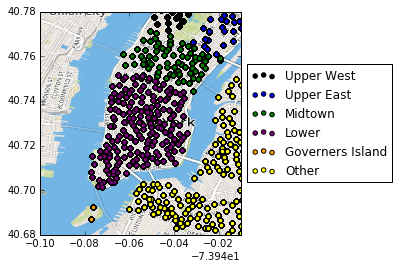

In [15]:
#df['neighborhood']
import matplotlib.pyplot as plt
%matplotlib inline
#upper west
#ax = df[df['neighborhood']==0].plot(x='start station longitude', y='start station latitude',kind='scatter',color='black')
#upper east
#df[df['neighborhood']==1].plot(x='start station longitude', y='start station latitude',kind='scatter',color='blue',ax=ax)
#midtown


xmin = -74.04
xmax = -73.95
ymin = 40.68
ymax = 40.78

import numpy as np
x = np.linspace(xmin,xmax)
y_top = topline_westside.m*x + topline_westside.b
y_bot = botline_westside.m*x + botline_westside.b
y_wes = wesline_westside.m*x + wesline_westside.b
y_eas = easline_westside.m*x + easline_westside.b
#print x
#print y

fig, ax = plt.subplots()
#ax.plot(x,y_top,color='r')
#ax.plot(x,y_bot,color='b')
#ax.plot(x,y_wes,color='g')
#ax.plot(x,y_eas,color='y')

#upper west
try:
    df[df['neighborhood']==0].plot(x='start station longitude', y='start station latitude',kind='scatter',color='black',label='Upper West',ax=ax)
except TypeError:
    pass
#upper east
try:
    df[df['neighborhood']==1].plot(x='start station longitude', y='start station latitude',kind='scatter',color='blue',label='Upper East',ax=ax)
except TypeError:
    pass
#midtown
try:
    df[df['neighborhood']==2].plot(x='start station longitude', y='start station latitude',kind='scatter',color='green',label='Midtown',ax=ax)
except TypeError:
    pass
#lower
try:
    df[df['neighborhood']==3].plot(x='start station longitude', y='start station latitude',kind='scatter',color='purple',label='Lower',ax=ax)
except TypeError:
    pass
#governers island
try:
    df[df['neighborhood']==4].plot(x='start station longitude', y='start station latitude',kind='scatter',color='orange',label='Governers Island',ax=ax)
except TypeError:
    pass
#other
df[df['neighborhood']==5].plot(x='start station longitude', y='start station latitude',kind='scatter',color='yellow',label='Other',ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.legend()


from scipy.misc import imread
img = imread("./265x382.jpg")
plt.imshow(img, zorder=0, extent=[xmin,xmax,ymin,ymax])
plt.ylabel('')
plt.xlabel('')
fig.savefig('static/neighborhoods.jpg')

In [16]:
#df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
#df['Datemod'] = df['starttime'].apply(lambda x: str(x.year)+str(x.month)+str(x.day))
from datetime import datetime
try:
    df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
except ValueError:
    try:
        df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M:%S')
    except ValueError:
        df['starttime'] = pandas.to_datetime(df['starttime'])
        #df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M')
df['Year'] = df['starttime'].apply(lambda x: x.year)
df['Month'] = df['starttime'].apply(lambda x: x.month)
df['Day'] = df['starttime'].apply(lambda x: x.day)
df_grouped = df.groupby([df['Year'],df['Month'],df['Day'],df['neighborhood']])

In [17]:
df['starttime']

0         2015-01-01 00:01:00
1         2015-01-01 00:02:00
2         2015-01-01 00:04:00
3         2015-01-01 00:04:00
4         2015-01-01 00:05:00
5         2015-01-01 00:07:00
6         2015-01-01 00:07:00
7         2015-01-01 00:08:00
8         2015-01-01 00:09:00
9         2015-01-01 00:10:00
10        2015-01-01 00:10:00
11        2015-01-01 00:11:00
12        2015-01-01 00:13:00
13        2015-01-01 00:13:00
14        2015-01-01 00:14:00
15        2015-01-01 00:14:00
16        2015-01-01 00:14:00
17        2015-01-01 00:16:00
18        2015-01-01 00:17:00
19        2015-01-01 00:18:00
20        2015-01-01 00:18:00
21        2015-01-01 00:18:00
22        2015-01-01 00:19:00
23        2015-01-01 00:20:00
24        2015-01-01 00:21:00
25        2015-01-01 00:21:00
26        2015-01-01 00:21:00
27        2015-01-01 00:22:00
28        2015-01-01 00:22:00
29        2015-01-01 00:22:00
                  ...        
9133814   2015-11-30 23:53:48
9133815   2015-11-30 23:53:52
9133816   

In [18]:
df_grouped.count()

starttime  start station latitude  \
Year Month Day neighborhood                                      
2015 1     1   2                   939                     939   
               3                  3859                    3859   
               5                   519                     519   
           2   2                  2765                    2765   
               3                  7801                    7801   
               5                   738                     738   
           3   2                   800                     800   
               3                  3303                    3303   
               5                   375                     375   
           4   2                  1295                    1295   
               3                  5930                    5930   
               5                   624                     624   
           5   2                  3913                    3913   
               3                  9768                    9768   
               5                   825                     825   
           6   2                  2535                    2535   
               3                  5708                    5708   
               5                   496                     496   
           7   2                  2698                    2698   
               3                  6412                    6412   
               5                   536                     536   
           8   2                  2500                    2500   
               3                  5813                    5813   
               5                   466                     466   
           9   2                  2097                    2097   
               3                  5435                    5435   
               5                   398                     398   
           10  2                  1042                    1042   
               3                  4656                    4656   
               5                   411                     411   
...                                ...                     ...   
     11    25  0                  1129                    1129   
               1                  1272                    1272   
               2                  6989                    6989   
               3                 18077                   18077   
               5                  2828                    2828   
           26  0                   706                     706   
               1                   725                     725   
               2                  2424                    2424   
               3                  7872                    7872   
               5                  1564                    1564   
           27  0                  1116                    1116   
               1                  1139                    1139   
               2                  4987                    4987   
               3                 13212                   13212   
               5                  2370                    2370   
           28  0                   744                     744   
               1                   672                     672   
               2                  2805                    2805   
               3                  9613                    9613   
               5                  1996                    1996   
           29  0                   869                     869   
               1                   872                     872   
               2                  2993                    2993   
               3                 11324                   11324   
               5                  2394                    2394   
           30  0                   822                     822   
               1                  1140                    1140   
               2                  7199                    7199   
   

In [19]:
test_df = pandas.DataFrame({'count': df.groupby([df['Year'],df['Month'],df['Day'],df['neighborhood']]).size()}).reset_index()

In [20]:
test_df.head()

,Year,Month,Day,neighborhood,count
0,2015,1,1,2,939
1,2015,1,1,3,3859
2,2015,1,1,5,519
3,2015,1,2,2,2765
4,2015,1,2,3,7801


In [21]:
result = pandas.merge(test_df,test_weather_df,on=['Year','Month','Day'])

In [22]:
result.head()

,Year,Month,Day,neighborhood,count,PRCP,SNOW,avg_temp
0,2015,1,1,2,939,0,0,0.418750
1,2015,1,1,3,3859,0,0,0.418750
2,2015,1,1,5,519,0,0,0.418750
3,2015,1,2,2,2765,0,0,4.053125
4,2015,1,2,3,7801,0,0,4.053125


In [23]:
# add in a new column for weekday
result['Month'] = result['Month'].apply('{:0>2}'.format)
result['Day'] = result['Day'].apply('{:0>2}'.format)
result['weekday'] = result['Year'].map(str)+'-'+result['Month']+'-'+result['Day']
result['weekday'] = pandas.to_datetime(result['weekday'], format='%Y-%m-%d')
result['weekday'] = result['weekday'].apply(lambda x: x.weekday())
result['neighborhood'] = result['neighborhood'].map(str)
#result['avg_temp'] = result['avg_temp'].apply(lambda x: int(round(x)))
result['avg_temp'] = result['avg_temp'].apply(lambda x: float(x))
result['weekday'] = result['weekday'].apply(lambda x: str(x))
result['PRCP'] = result['PRCP'].map(int)
result['SNOW'] = result['SNOW'].map(int)
result.head()

,Year,Month,Day,neighborhood,count,PRCP,SNOW,avg_temp,weekday
0,2015,01,01,2,939,0,0,0.418750,3
1,2015,01,01,3,3859,0,0,0.418750,3
2,2015,01,01,5,519,0,0,0.418750,3
3,2015,01,02,2,2765,0,0,4.053125,4
4,2015,01,02,3,7801,0,0,4.053125,4


In [ ]:
#pandas.get_dummies(result[['start station id','avg_temp','weekday']])
#result['PRCP'] = result['PRCP'].apply(lambda x: if int(x)>0: )

In [81]:
#build a model to take in station id, day of week, and temperature to predict number of riders for a given day
# try a random forest model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import grid_search

#X = result.as_matrix(columns=['neighborhood', 'avg_temp', 'weekday'])
#y = result['count'].values
X = result[['neighborhood', 'avg_temp', 'weekday','PRCP','SNOW']]
y = result['count']

#one-hot encoding
#enc = OneHotEncoder(categorical_features='all', sparse=True)
vectorizer = DV(sparse=True)
X = X[['neighborhood','avg_temp','weekday','PRCP','SNOW']].T.to_dict().values()
X = vectorizer.fit_transform(X)
y = y.values

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#X_train = X_train.reset_index().drop('index',axis=1)
#y_train = y_train.reset_index().drop('index',axis=1)
#X_test = X_test.reset_index().drop('index',axis=1)
#y_test = y_test.reset_index().drop('index',axis=1)
#print y_train
#type(y_train)

#one-hot encoding
#enc = OneHotEncoder(categorical_features='all', sparse=True)
#vectorizer = DV()
#X_train = X_train[['neighborhood','avg_temp','weekday']].T.to_dict().values()
#X_train = vectorizer.fit_transform(X_train)
#y_train = y_train['count'].values

#df_random = result.sample(frac=0.1).reset_index()
#print X
#print y



#amatrix = df_random.as_matrix(columns=['start station id','avg_temp','weekday'])
#print amatrix
#train = enc.fit_transform(amatrix)
#print df_random.head()
#train = df_random.as_matrix(columns=['start station id', 'avg_temp', 'weekday'])
#train = pandas.get_dummies(df_random[['start station id','avg_temp','weekday']]).as_matrix()
#labels = df_random.as_matrix(columns=['count'])
#labels = df_random['count'].values
#labels = df_random.as_matrix(columns=['count']).reshape(len(labels),)
#labels = labels.T
#print train
#print labels
#print len(labels)

####try the cross validation with K fold
#cv = KFold(len(y_train), n_folds=4, shuffle=True)
#params = {'n_estimators':[2,5,10,20,30,50,100,500]}
#grid = grid_search.GridSearchCV(RandomForestRegressor(),cv=cv,param_grid=params)
#grid.fit(X_train, y_train)
#print grid.best_score_
#print grid.best_params_
#print grid.score(X_test,y_test)

#bestscores = grid.grid_scores_
#print bestscores
#model
#rf = RandomForestClassifier(n_estimators=10)
rf = RandomForestRegressor(n_estimators=20)
#rf = GaussianNB()
#rf = svm.SVC()
rf.fit(X_train, y_train)
print rf.score(X_train, y_train)
print rf.score(X_test, y_test)

#rf.score(vectorizer.transform(X_test[['neighborhood','avg_temp','weekday']].T.to_dict().values()),y_test['count'].values)

0.988519999241
0.940906863075


In [ ]:
feature_names = vectorizer.feature_names_

[ 0.90223686  0.91668064  0.92153198  0.92747454  0.92937994  0.92951842
  0.92785518  0.92836349]
[  2   5  10  20  30  50 100 500]


<Container object of 8 artists>

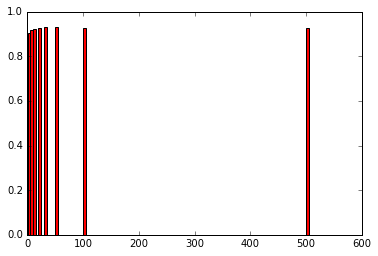

In [77]:
#print grid.scorer_
scorelist = np.array([bestscores[i][1] for i in xrange(len(bestscores))])
paramlist = np.array([bestscores[i][0]['n_estimators'] for i in xrange(len(bestscores))])
print scorelist
print paramlist

plt.bar(paramlist, scorelist, 5, color='r')

In [ ]:
print rf.score(X_train, y_train)
avgscore = 0
for i in xrange(len(y_train)):
    avgscore += abs(float(y_train[i])-float(rf.predict(X_train[i].reshape(1,-1))))/float(y_train[i])
    
avgscore = avgscore/len(y_train)
print avgscore

In [ ]:
print rf.score(X_test,y_test)
avgscore = 0
for i in xrange(len(y_test)):
    avgscore += abs(float(y_test[i])-float(rf.predict(X_test[i].reshape(1,-1))))/float(y_test[i])
    
avgscore = avgscore/len(y_test)
print avgscore

print y_test
print rf.predict(X_test)

In [82]:
rf.feature_importances_

array([  2.21794046e-02,   3.79602176e-04,   3.05647131e-01,
         1.10474176e-05,   1.11871265e-05,   5.00303629e-02,
         5.88634906e-01,   6.63281693e-04,   3.06057152e-03,
         2.96449188e-03,   2.39683795e-03,   2.51299393e-03,
         1.38848255e-03,   1.40125390e-03,   7.16451666e-03,
         1.15539287e-02])

In [83]:
testdict = [{'neighborhood': '5', 'avg_temp': 20., 'weekday': '3'}]
print rf.predict(vectorizer.transform(testdict))

[ 3590.85]


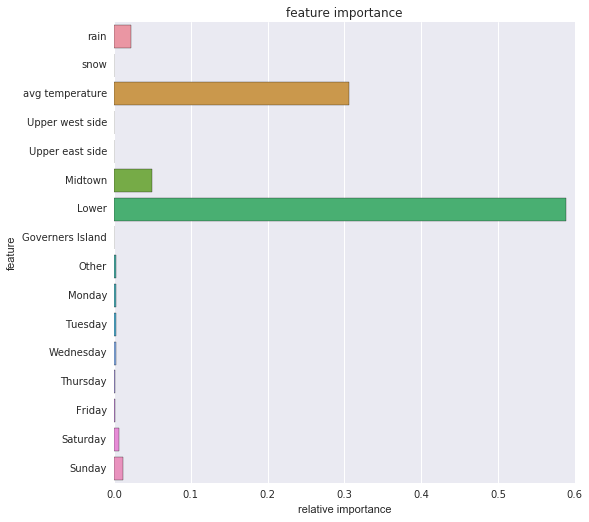

In [97]:
import seaborn as sns
from pylab import *

figure(1, figsize=(8,8))
ax = axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('feature importance')
feature_importances = rf.feature_importances_
labels = ['rain','snow','avg temperature','Upper west side','Upper east side','Midtown','Lower','Governers Island','Other','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.axlabel('relative importance','feature')
fig = sns.barplot(x=feature_importances,y=['rain','snow','avg temperature','Upper west side','Upper east side','Midtown','Lower','Governers Island','Other','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#fig = plt.bar(x=feature_importances,y=['rain','snow','avg temperature','Upper west side','Upper east side','Midtown','Lower','Governers Island','Other','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#plt.hist(feature_importances)
#plt.show()
#fig.savefig('static/feature_importance.jpg')
#explode=(0, 0.05, 0, 0)
#pie(feature_importances,labels=labels)
#title('feature importance')
#show()

In [ ]:
from sklearn.externals.six import StringIO 
import pydot
from sklearn import tree

trees = rf.estimators_

dot_data = StringIO() 
tree.export_graphviz(trees[0], out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [98]:
import dill as pickle

outfile = "model_pickled.pkl"

with open(outfile,'wb') as fp:
    pickle.dump(vectorizer, fp)
    pickle.dump(rf, fp)


In [ ]:
temp_df = pandas.read_csv(filelist[-2])

import matplotlib.pyplot as plt
%matplotlib inline
#upper west
#ax = df[df['neighborhood']==0].plot(x='start station longitude', y='start station latitude',kind='scatter',color='black')
#upper east
#df[df['neighborhood']==1].plot(x='start station longitude', y='start station latitude',kind='scatter',color='blue',ax=ax)
#midtown


xmin = -74.04
xmax = -73.95
ymin = 40.68
ymax = 40.78

import numpy as np
x = np.linspace(xmin,xmax)
y_top = topline_lower.m*x + topline_lower.b
y_bot = botline_lower.m*x + botline_lower.b
y_wes = wesline_lower.m*x + wesline_lower.b
y_eas = easline_lower.m*x + easline_lower.b
#print x
#print y

fig, ax = plt.subplots()

#ax.plot(x,y_top,color='r')
#ax.plot(x,y_bot,color='b')
#ax.plot(x,y_wes,color='g')
#ax.plot(x,y_eas,color='y')

#upper west
try:
    temp_df[temp_df['neighborhood']==0].plot(x='start station longitude', y='start station latitude',kind='scatter',color='black',label='Upper West',ax=ax)
except TypeError:
    pass
#upper east
try:
    temp_df[temp_df['neighborhood']==1].plot(x='start station longitude', y='start station latitude',kind='scatter',color='blue',label='Upper East',ax=ax)
except TypeError:
    pass
#midtown
try:
    temp_df[temp_df['neighborhood']==2].plot(x='start station longitude', y='start station latitude',kind='scatter',color='green',label='Midtown',ax=ax)
except TypeError:
    pass
#lower
try:
    temp_df[temp_df['neighborhood']==3].plot(x='start station longitude', y='start station latitude',kind='scatter',color='purple',label='Lower',ax=ax)
except TypeError:
    pass
#governers island
try:
    temp_df[temp_df['neighborhood']==4].plot(x='start station longitude', y='start station latitude',kind='scatter',color='orange',label='Governers Island',ax=ax)
except TypeError:
    pass
#other
temp_df[temp_df['neighborhood']==5].plot(x='start station longitude', y='start station latitude',kind='scatter',color='yellow',label='Other',ax=ax)

plt.legend()


from scipy.misc import imread
img = imread("./265x382.jpg")
plt.imshow(img, zorder=0, extent=[xmin,xmax,ymin,ymax])
